In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Preparation

In [14]:
City = pd.read_csv(r'C:\Users\78641\Downloads\City.csv')
Customer_ID = pd.read_csv(r'C:\Users\78641\Downloads\Customer_ID.csv')
Cab_Data = pd.read_csv(r'C:\Users\78641\Downloads\Cab_Data.csv')
Transaction_ID = pd.read_csv(r'C:\Users\78641\Downloads\Transaction_ID.csv')

dataset = {
    'City' : City,
    'Customer_ID' : Customer_ID,
    'Cab_Data' : Cab_Data,
    'Transaction_ID' : Transaction_ID
}

for name, value in dataset.items():
    print(f'{name} preveiw:')
    display(value.head())
    print(f'{name} data types:')
    display(value.dtypes)

City preveiw:


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


City data types:


City          object
Population    object
Users         object
dtype: object

Customer_ID preveiw:


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


Customer_ID data types:


Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Cab_Data preveiw:


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Cab_Data data types:


Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

Transaction_ID preveiw:


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Transaction_ID data types:


Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

Drop 'Date of Travel' in Cab_Data.
Convert 'Population' and 'Users' in City to int type.

In [15]:
Cab_Data.drop('Date of Travel', axis= 1, inplace= True)
if City['Population'].dtype == 'object':
    City['Population'] = City['Population'].str.replace(',', '').astype(int)
if City['Users'].dtype == 'object':
    City['Users'] = City['Users'].str.replace(',', '').astype(int)

Check for missing values in each dataset.

In [16]:
{name: data.isnull().sum() for name, data in dataset.items()}

{'City': City          0
 Population    0
 Users         0
 dtype: int64,
 'Customer_ID': Customer ID           0
 Gender                0
 Age                   0
 Income (USD/Month)    0
 dtype: int64,
 'Cab_Data': Transaction ID    0
 Company           0
 City              0
 KM Travelled      0
 Price Charged     0
 Cost of Trip      0
 dtype: int64,
 'Transaction_ID': Transaction ID    0
 Customer ID       0
 Payment_Mode      0
 dtype: int64}

Check for duplicate values in each dataset

In [17]:
{name : data.duplicated().sum() for name, data in dataset.items()}

{'City': 0, 'Customer_ID': 0, 'Cab_Data': 0, 'Transaction_ID': 0}

Merge tables and edit column names, add new column

In [18]:
df = pd.merge(Cab_Data, Transaction_ID, on='Transaction ID')
df = pd.merge(df, Customer_ID, on= 'Customer ID')
df = pd.merge(df, City, on= 'City')
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808


--------------------------------------------------------------------------------------------------------------------------

Demographic Influence: How do customer demographics such as age, gender, and income level affect cab usage patterns? For instance, we can investigate if higher-income individuals tend to spend more on cab rides or if there's a noticeable preference for one cab company over another among different age groups.

In [28]:
# Group by gender and calculate average profit and order counts.
gender_stats = df.groupby(['Company', 'Gender']).agg({'Profit':'sum', 'Transaction ID' : 'count'}).rename(columns={'Profit' : 'Total Profit', 'Transaction ID' : 'Order Count'}).unstack()
gender_stats

Total Profit               Order Count        
Gender            Female          Male      Female    Male
Company                                                   
Pink Cab    2.330533e+06  2.976796e+06       37480   47231
Yellow Cab  1.813142e+07  2.588896e+07      116000  158681

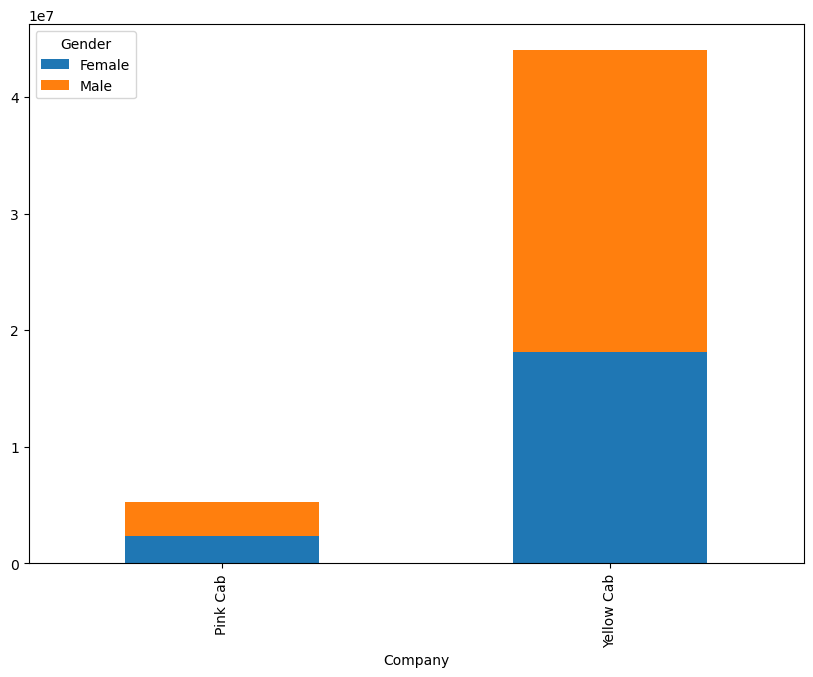

In [20]:
# Group by gender and calculate average profit and order counts.
plot_data = gender_stats['Total Profit']
plot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.show()

In [21]:
# Group by age.
age_bins = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '25-35', '35-45', '45-55', '55-65'])
age_stats = df.groupby(['Company', age_bins]).agg({'Profit':'sum', 'Transaction ID' : 'count'}).rename(columns={'Profit' : 'Total Profit', 'Transaction ID' : 'Order Count'}).unstack()
age_stats

Total Profit                                          \
Age                18-25         25-35        35-45        45-55   
Company                                                            
Pink Cab    1.238112e+06  1.672132e+06  1105317.567   560713.652   
Yellow Cab  1.010082e+07  1.385856e+07  9414415.162  4769071.282   

                         Order Count                              
Age                55-65       18-25  25-35  35-45  45-55  55-65  
Company                                                           
Pink Cab    5.644938e+05       19444  26678  17830   9001   9082  
Yellow Cab  4.533552e+06       63054  86736  58168  29559  28994

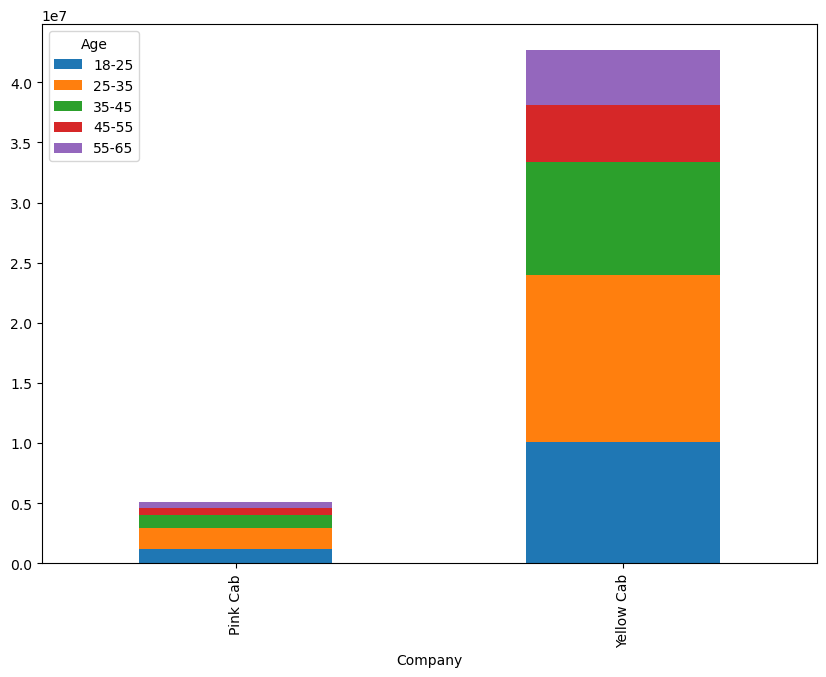

In [22]:
plot_data = age_stats['Total Profit']
plot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.show()

In [23]:
# Group by income quartiles
income_bins = pd.cut(df['Income (USD/Month)'], bins= [0, 2500, 15000, 50000], labels=['low', 'medium', 'high'])
income_stats = df.groupby(['Company', income_bins]).agg({'Profit':'sum', 'Transaction ID' : 'count'}).rename(columns={'Profit' : 'Total Profit', 'Transaction ID' : 'Order Count'}).unstack()
income_stats

Total Profit                             Order Count  \
Income (USD/Month)          low        medium          high         low   
Company                                                                   
Pink Cab            107193.4440  2.579772e+06  2.620362e+06        1709   
Yellow Cab          842536.0688  2.141685e+07  2.176099e+07        5302   

                                    
Income (USD/Month)  medium    high  
Company                             
Pink Cab             41546   41456  
Yellow Cab          135315  134064

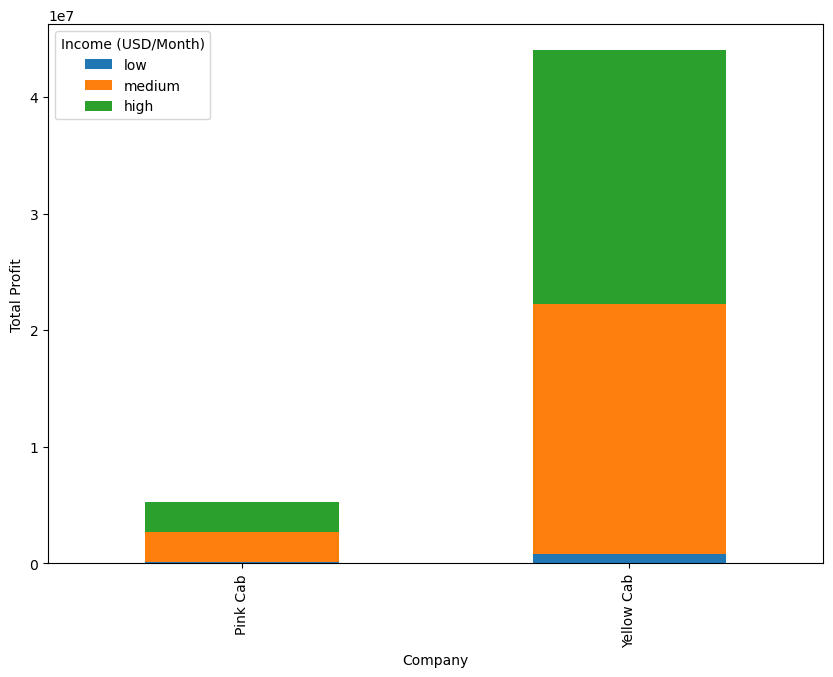

In [24]:
plot_data = income_stats['Total Profit']
plot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.ylabel('Total Profit')
plt.show()

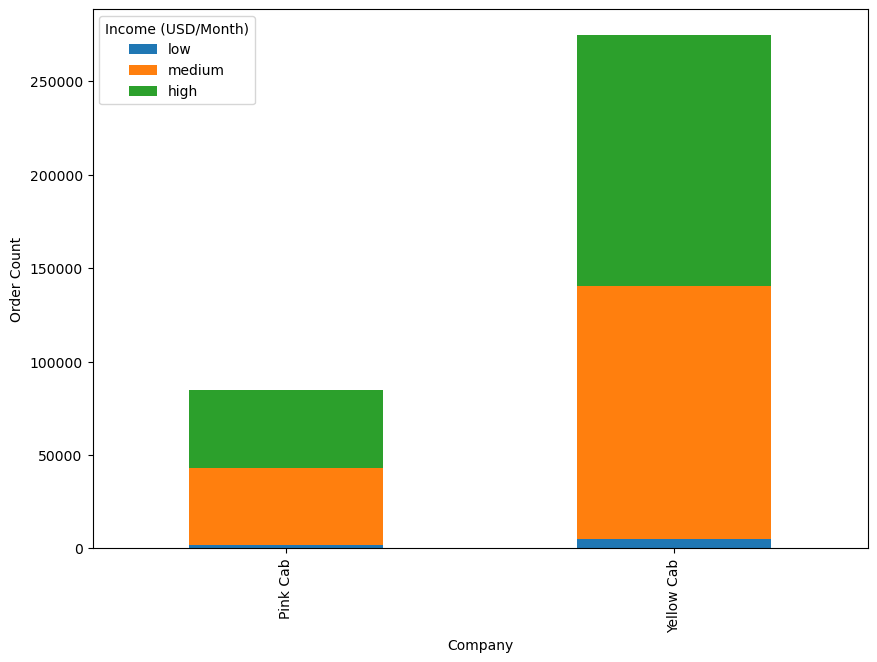

In [26]:
plot_data = income_stats['Order Count']
plot_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.ylabel('Order Count')
plt.show()

Geographic Analysis: What is the user base as well as revenue status of both companies in various cities?

In [31]:
city_stats = df.groupby(['City', 'Company']).agg({'Profit':'sum', 'Transaction ID' : 'count'}).rename(columns={'Profit' : 'Total Profit', 'Transaction ID' : 'Order Count'}).unstack()
city_stats

Total Profit               Order Count           
Company            Pink Cab    Yellow Cab    Pink Cab Yellow Cab
City                                                            
ATLANTA GA        96050.076  7.463828e+05        1762       5795
AUSTIN TX        147445.290  3.792557e+05        1868       3028
BOSTON MA        262001.698  1.506718e+06        5186      24506
CHICAGO IL       318722.488  3.068591e+06        9361      47264
DALLAS TX         24730.112  1.104003e+06        1380       5637
DENVER CO         40584.939  3.570001e+05        1394       2431
LOS ANGELES CA  1125732.065  3.285977e+06       19865      28168
MIAMI FL         162301.191  5.960001e+05        2002       4452
NASHVILLE TN      64284.534  8.524768e+04        1841       1169
NEW YORK NY     1511474.388  2.645108e+07       13967      85918
ORANGE COUNTY    101995.833  3.550060e+05        1513       2469
PHOENIX AZ        35596.394  1.573445e+05         864       1200
PITTSBURGH PA     17107.738  6.805822e+04         682        631
SACRAMENTO CA     55324.012  6.200218e+04        1334       1033
SAN DIEGO CA     637889.769  9.492737e+05       10672       9816
SEATTLE WA       112781.335  4.919035e+05        2732       5265
SILICON VALLEY   340250.531  9.764547e+05        3797       4722
TUCSON AZ         59289.575  8.097112e+04         799       1132
WASHINGTON DC    193766.353  3.299104e+06        3692      40045

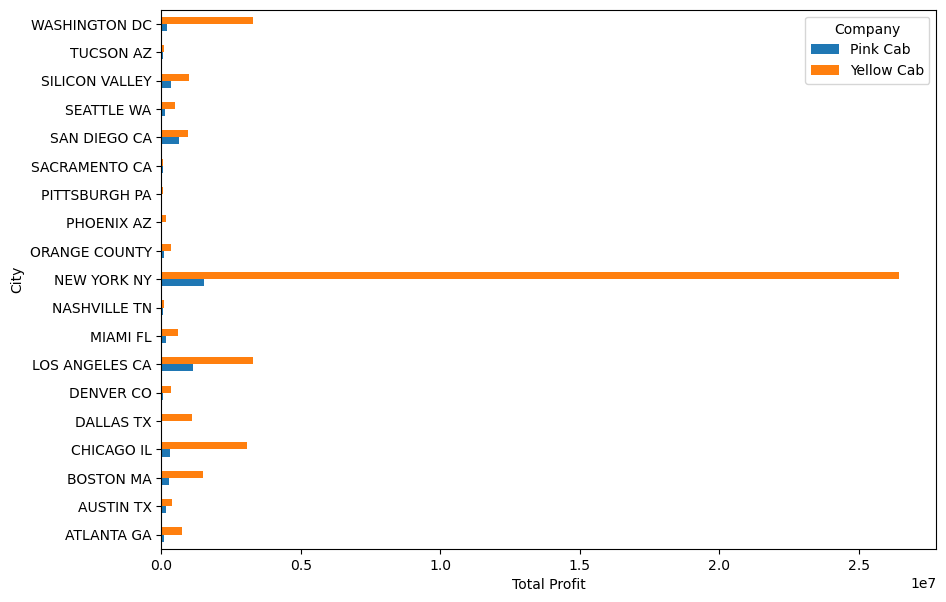

In [34]:
temp = city_stats['Total Profit']
temp.plot(kind='barh', stacked=False, figsize=(10, 7))
plt.xlabel('Total Profit')
plt.show()

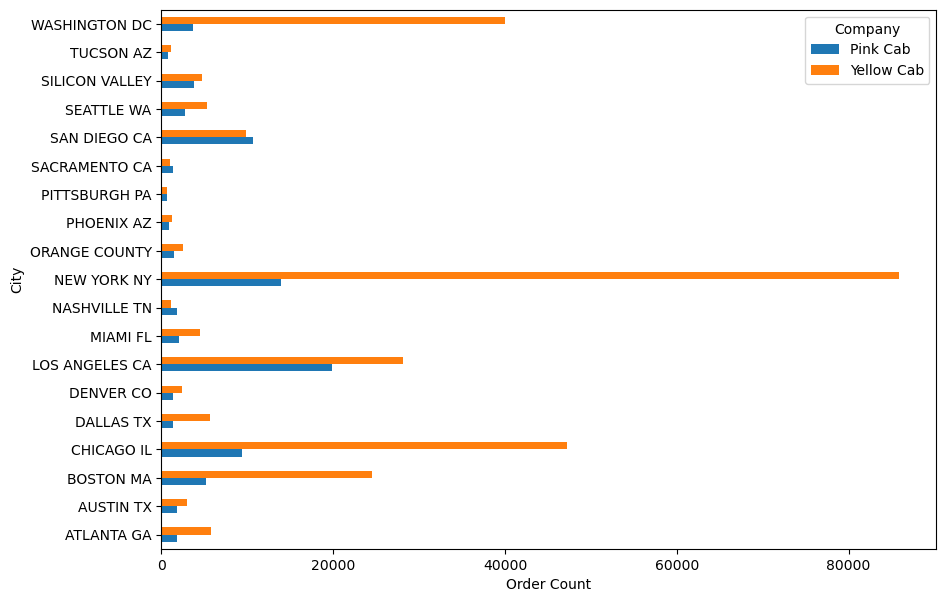

In [35]:
temp = city_stats['Order Count']
temp.plot(kind='barh', stacked=False, figsize=(10, 7))
plt.xlabel('Order Count')
plt.show()

Customer Loyalty and Segmentation: Can we identify loyal customer segments based on repeated usage patterns? Analyzing the frequency of rides per customer might help in understanding customer retention and the effectiveness of each company's marketing strategies.

In [42]:
# Calculate the number of orders per customer
loyal_users = df.groupby('Customer ID').agg({'Transaction ID' : 'count'}).rename(columns={'Transaction ID' : 'Order Count'})
# Sort values
loyal_users = loyal_users.sort_values(by='Order Count', ascending=False)
# Choose top 5% users as loyal users
threshold = loyal_users['Order Count'].quantile(0.95)
loyal_users = loyal_users[loyal_users['Order Count'] >= threshold]
# Merge with the df table to get more details
loyal_users = pd.merge(df, loyal_users, on='Customer ID')
loyal_users

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Order Count
0,10000038,Pink Cab,CHICAGO IL,39.55,540.93,454.8250,5785,Card,Male,21,11230,1955130,164468,86.1050,30
1,10006119,Yellow Cab,CHICAGO IL,10.89,190.14,139.8276,5785,Card,Male,21,11230,1955130,164468,50.3124,30
2,10017166,Yellow Cab,CHICAGO IL,40.70,508.23,542.1240,5785,Card,Male,21,11230,1955130,164468,-33.8940,30
3,10017243,Yellow Cab,CHICAGO IL,3.12,43.85,44.9280,5785,Card,Male,21,11230,1955130,164468,-1.0780,30
4,10020919,Yellow Cab,CHICAGO IL,39.52,613.27,564.3456,5785,Cash,Male,21,11230,1955130,164468,48.9244,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87110,10370514,Yellow Cab,WASHINGTON DC,11.77,157.45,163.8384,53241,Cash,Female,47,24390,418859,127001,-6.3884,29
87111,10370520,Yellow Cab,WASHINGTON DC,38.76,626.22,520.9344,53241,Card,Female,47,24390,418859,127001,105.2856,29
87112,10384337,Yellow Cab,WASHINGTON DC,3.03,52.55,39.9960,53241,Card,Female,47,24390,418859,127001,12.5540,29
87113,10399374,Yellow Cab,WASHINGTON DC,15.68,273.72,197.5680,53241,Cash,Female,47,24390,418859,127001,76.1520,29


In [43]:
# Calculate the number of loyal customers for each company and city
loyal_stats = loyal_users.groupby(['Company', 'City']).agg({'Transaction ID' : 'count'}).rename(columns={'Transaction ID' : 'Order Count'}).unstack()
loyal_stats

Order Count                                         
City        CHICAGO IL LOS ANGELES CA NEW YORK NY WASHINGTON DC
Company                                                        
Pink Cab           293            123       11867            13
Yellow Cab        1458            148       73109           104

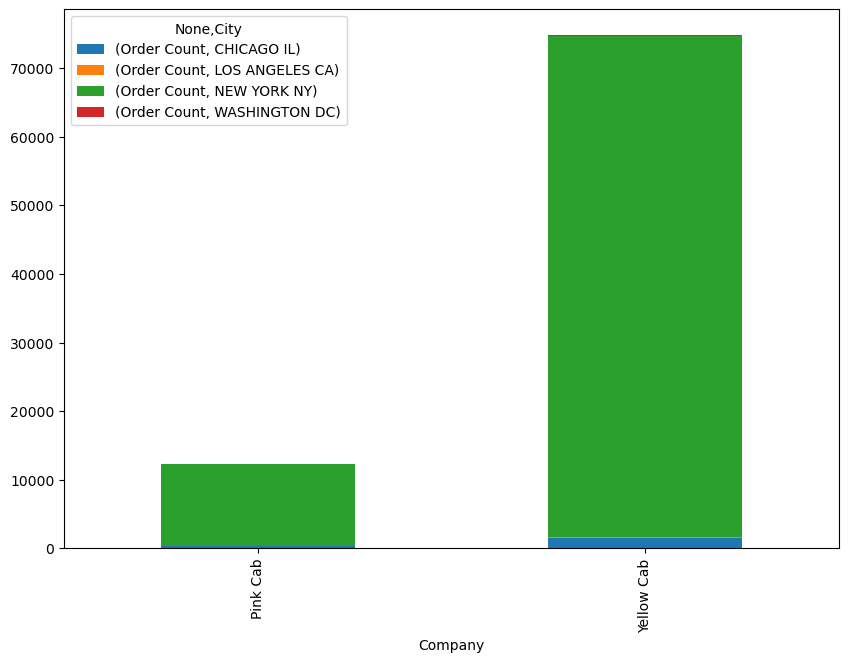

In [44]:
loyal_stats.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.show()

Price Sensitivity: Are there differences in the average price charged per kilometer between the two cab companies, and what might this indicate about their pricing strategies or customer preferences? This could help in understanding the competitive positioning of each company.

In [45]:
# Calculate Price Per Kilometer for each ride
df['Price Per KM'] = df['Price Charged'] / df['KM Travelled']

# Calculate mean price per kilometer group by company
price_km_stats = df.groupby('Company').agg({'Price Per KM' : 'mean'}).reset_index()
price_km_stats

,Company,Price Per KM
0,Pink Cab,13.768510
1,Yellow Cab,20.306073


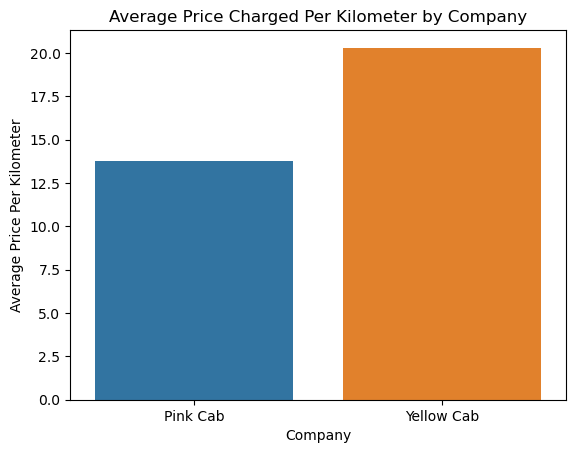

In [46]:
sns.barplot(x='Company', y='Price Per KM', data=price_km_stats)
plt.title('Average Price Charged Per Kilometer by Company')
plt.ylabel('Average Price Per Kilometer')
plt.show()

Profitability Analysis: Which company shows better operational efficiency based on the ratio of price charged to the cost of the trip? This analysis might reveal which company manages its resources more effectively, potentially making it a more attractive investment.

In [29]:
df['Profitability'] = df['Profit'] / df['Cost of Trip']
profit_stats = df.groupby('Company').agg({'Profitability' : 'mean'})
profit_stats

,Profitability
Company,
Pink Cab,0.255596
Yellow Cab,0.542966


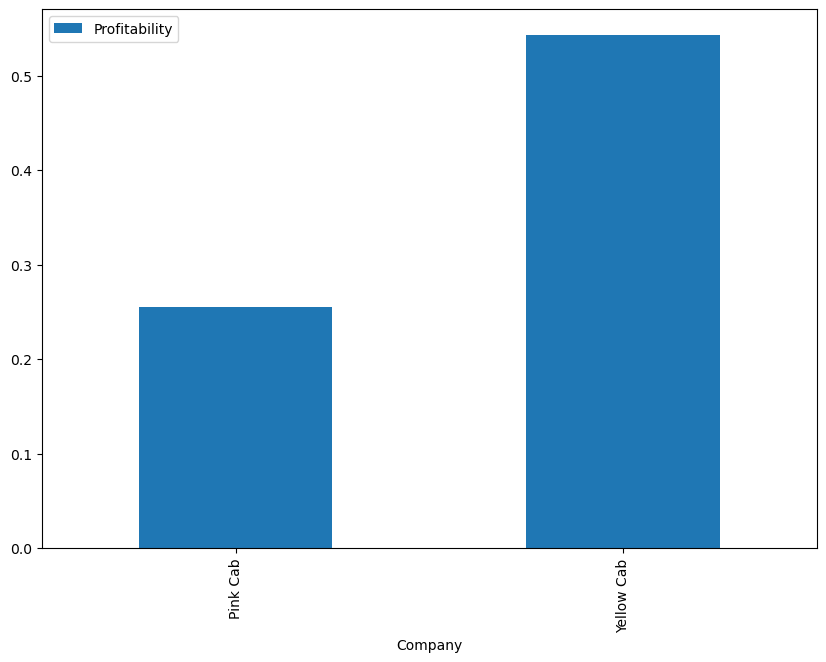

In [30]:
profit_stats.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.show()